# Analysis

#### Based on the results, compared against the other treatment regimens, Capomulin seems to be the second best treatment for SCC (ave. tumor volume: 40.68) following behind Ramicane (40.22). With a std. error of 0.33~ indicating a relatively small margin of error, this sample population reflex the whole population. However, according to the correlation charts, body weight/mass can impact Capomulin's effectiveness in decreasing the size of tumors. 

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pymaceuticals_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
pymaceuticals_data.head()

plt.ioff()

In [20]:
# Number of mice.
len(pymaceuticals_data["Mouse ID"].unique())

249

In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_rows = pymaceuticals_data.duplicated(subset=['Mouse ID', 'Timepoint'])
duplicated_mice = pymaceuticals_data.loc[duplicated_rows,'Mouse ID'].unique()
duplicated_mice

array(['g989'], dtype=object)

In [22]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = pymaceuticals_data[pymaceuticals_data['Mouse ID'].isin(duplicated_mice)==False]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
means = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
medians = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variances = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdevs = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sems = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_table = pd.DataFrame({"Mean Tumor Volume":means,
                              "Median Tumor Volume":medians,
                              "Tumor Volume Variance":variances,
                              "Tumor Volume Std. Dev.":stdevs,
                              "Tumor Volume Std. Err.":sems})
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

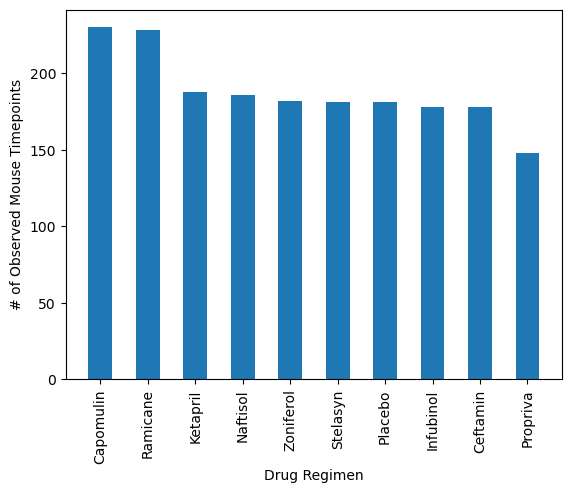

In [25]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_count = clean_data['Drug Regimen'].value_counts()
drug_regimen_chart = drug_regimen_count.plot(kind='bar')
drug_regimen_chart.set_xlabel("Drug Regimen")
drug_regimen_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.autoscale()
plt.show()

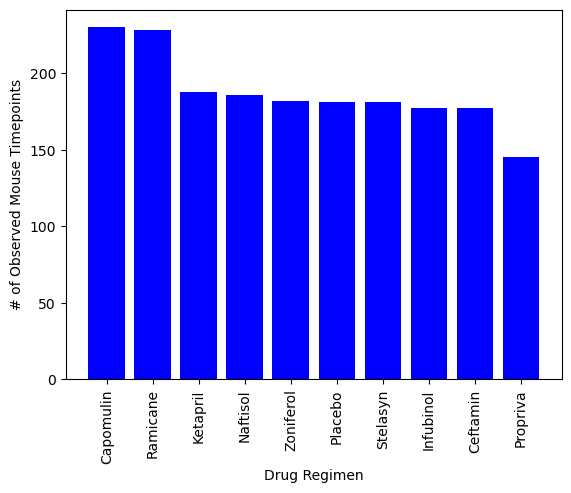

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
timepoints = [230, 228, 188, 186, 182, 181, 181, 177, 177, 145]
x_axis = np.arange(len(timepoints))
plt.bar(x_axis, timepoints, color='b', align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"])
plt.xticks(rotation=90)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

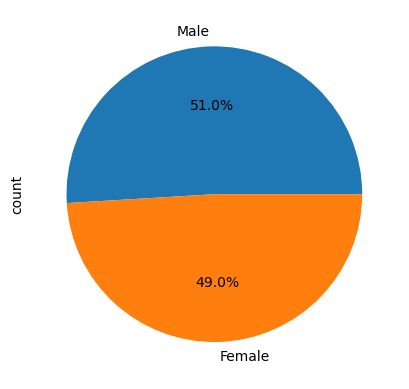

In [36]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
male_female_counts = clean_data.Sex.value_counts()
male_female_counts.plot(kind="pie",autopct='%.1f%%')
plt.show()

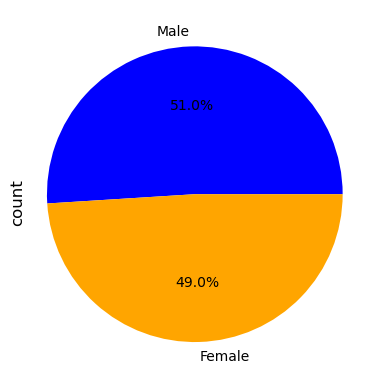

In [44]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
genders = ["Male", "Female"]

# The values of each section of the pie chart
count = [51,49]

# The colors of each section of the pie chart
colors = ["blue","orange"]

plt.pie(count, labels=genders, colors=colors,
        autopct="%.1f%%")
plt.title("count", loc='left', y=0.4, rotation='vertical')
plt.show()

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor = clean_data.groupby(["Mouse ID"])['Timepoint'].max()
final_tumor = final_tumor.reset_index()
print(final_tumor)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = final_tumor.merge(clean_data, on=['Mouse ID','Timepoint'], how="left")
print(merged_data)

    Mouse ID  Timepoint
0       a203         45
1       a251         45
2       a262         45
3       a275         45
4       a366         30
..       ...        ...
243     z435         10
244     z578         45
245     z581         45
246     z795         45
247     z969         45

[248 rows x 2 columns]
    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0   

In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vols = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vols)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vols.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vols.loc[(tumor_vols < lower_bound) | (tumor_vols > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\phill\AppData\Local\Temp\ipykernel_20876\1057086171.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_vol_data, labels = treatments, flierprops=mark_outlier_red)


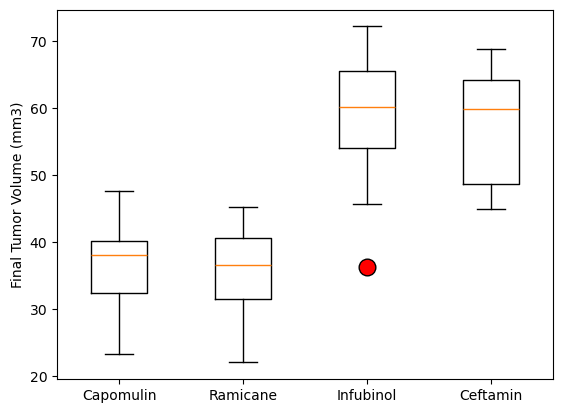

In [48]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
mark_outlier_red = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol_data, labels = treatments, flierprops=mark_outlier_red)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

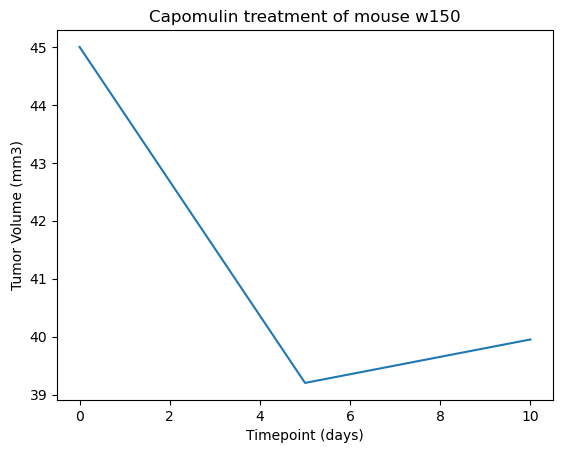

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_chart = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
treated_mouse = capomulin_chart.loc[capomulin_chart['Mouse ID']== 'w150']
plt.plot(treated_mouse['Timepoint'],treated_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse w150')
plt.show()

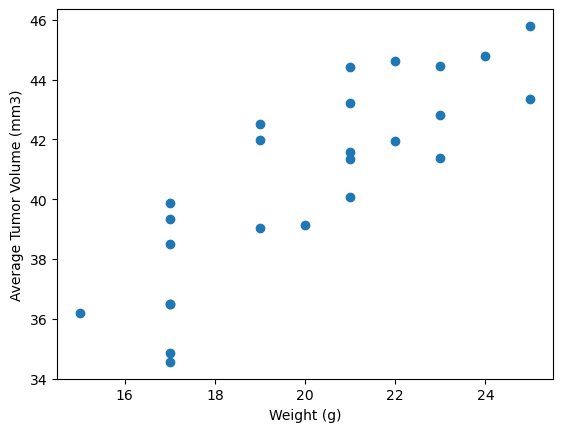

In [50]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_chart = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin"]
tumor_ave = capomulin_chart.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(tumor_ave['Weight (g)'],tumor_ave['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


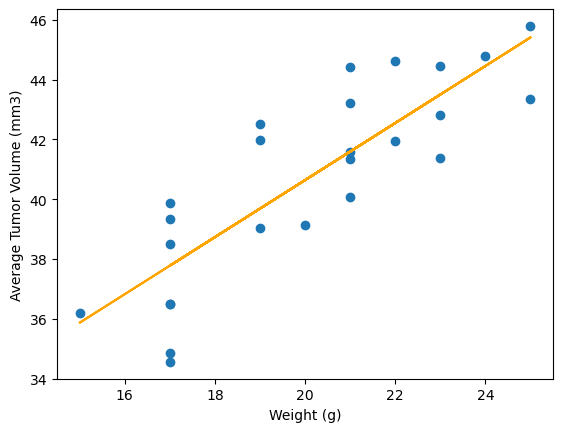

In [51]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=round(st.pearsonr(tumor_ave['Weight (g)'],tumor_ave['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
model = st.linregress(tumor_ave['Weight (g)'],tumor_ave['Tumor Volume (mm3)'])

y_values = tumor_ave['Weight (g)']*model[0]+model[1]
plt.scatter(tumor_ave['Weight (g)'],tumor_ave['Tumor Volume (mm3)'])
plt.plot(tumor_ave['Weight (g)'],y_values,color="Orange")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()